<a href="https://colab.research.google.com/github/JESWIN-AJ/-/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplot.pylot as plt


ModuleNotFoundError: No module named 'matplot'

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt # Changed matplot.pylot to matplotlib.pyplot

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255



In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1, 28*28,1)
x_test = x_test.reshape(-1, 28*28,1)

In [ ]:
model = keras.Sequential([
    keras.layers.conv2d(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.max_pooling2d(pool_size=(2,2)),
    keras.layers.conv2d(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.max_pooling2d(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'conv2d'

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # Changed conv2d to Conv2D
    keras.layers.MaxPooling2D(pool_size=(2,2)), # Changed max_pooling2d to MaxPooling2D
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), # Changed conv2d to Conv2D
    keras.layers.MaxPooling2D(pool_size=(2,2)), # Changed max_pooling2d to MaxPooling2D
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9901 - val_loss: 0.0372
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 37ms/step - accuracy: 0.9975 - loss: 0.0069 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.9976 - loss: 0.0066 - val_accuracy: 0.9916 - val_loss: 0.0383
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9923 - val_loss: 0.0320
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9986 - loss: 0.0039 - val_accuracy: 0.9907 - val_loss: 0.0438


In [ ]:
test_acc ,test_loss = model.evaluate(x_test, y_test)
print('Test accuracy:',test_acc)
print('test_loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9887 - loss: 0.0555
Test accuracy: 0.0438237264752388
test_loss: 0.9907000064849854


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


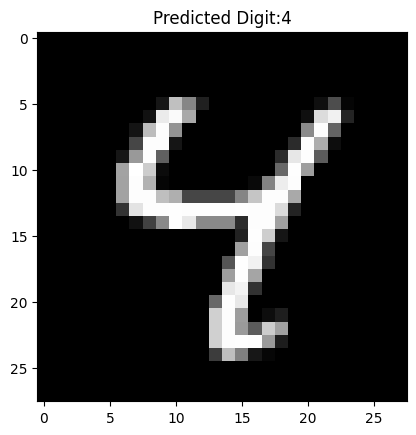

In [ ]:
def predict_digit(i):
  prediction = model.predict(x_test)
  predicted_digit = np.argmax(prediction[i])
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title(f'Predicted Digit:{predicted_digit}')
  plt.show()

predict_digit(6)